In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [6]:
dataset = pd.read_csv("IPL.csv")

In [7]:
dataset.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [16]:
# drop the 'method' feature
dataset.drop(['method'],axis=1,inplace=True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


### Most wins in IPL 

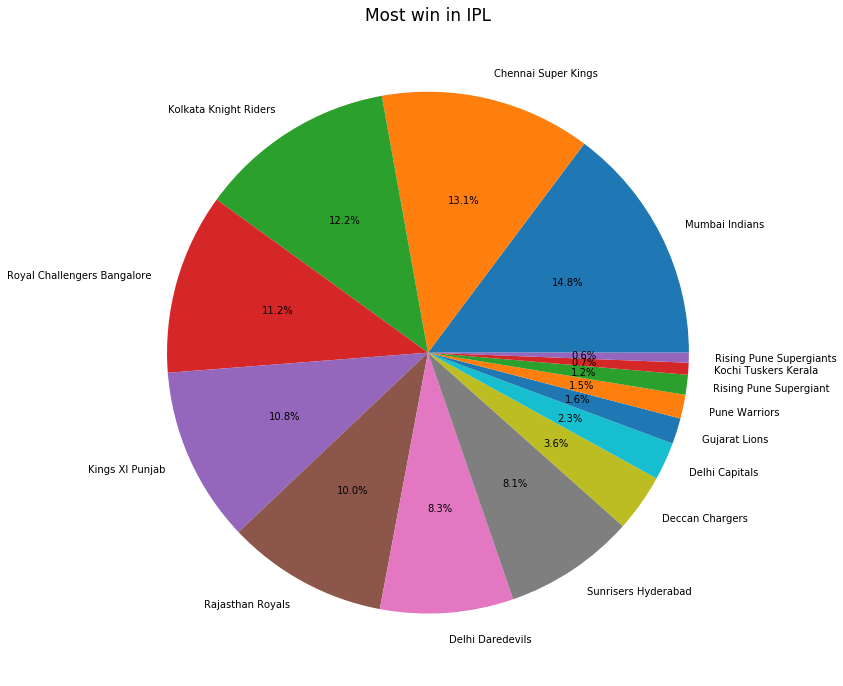

In [9]:
temp = pd.DataFrame({"winner": dataset['winner']})
count_wins = temp['winner'].value_counts()
# print(count_wins)
labels = [X for X in count_wins.keys()]
# labels
bar,ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x=count_wins,autopct='%1.1f%%', labels=labels,)
plt.title('Most win in IPL', fontsize = 17)
plt.show()


### Most wins in Eliminator

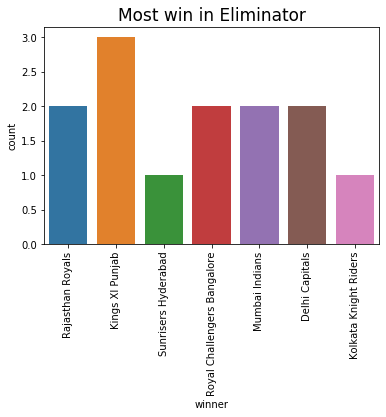

In [10]:
sns.countplot(dataset['winner'][dataset['eliminator']=='Y'], data=dataset)
plt.title('Most win in Eliminator', fontsize=17)
plt.xticks(rotation=90)
plt.show()

### Toss Decision 

In [30]:
teams = dataset['toss_winner'].unique()
# print(teams)
decision_making = pd.DataFrame([], columns=['Toss Winner','Decision','Times'])
for id,element in enumerate(teams):
    temp_bat = dataset[(dataset['toss_winner']==element)&(dataset['toss_decision']=='bat')]
    temp_field = dataset[(dataset['toss_winner']==element)&(dataset['toss_decision']=='field')]
    
#     append to decision making
    decision_making = decision_making.append({'Toss Winner':element,'Decision':'bat','Times':temp_bat['toss_winner'].count()}, ignore_index=True)
    decision_making = decision_making.append({'Toss Winner':element,'Decision':'field','Times':temp_field['toss_winner'].count()}, ignore_index=True)

In [31]:
decision_making.head()

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34


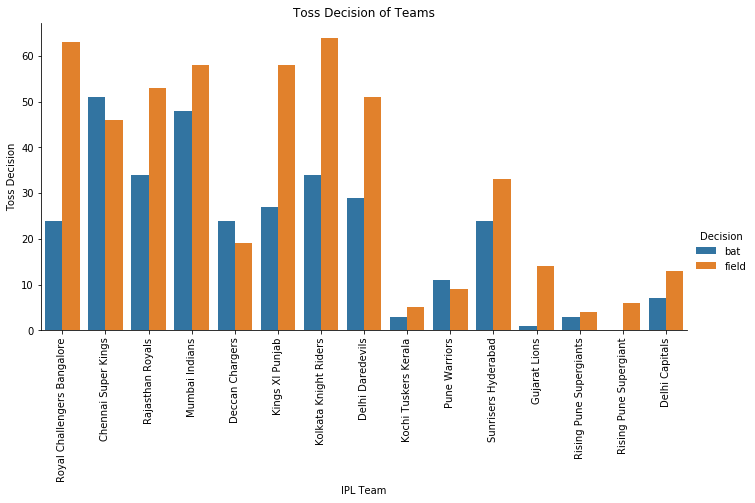

In [32]:
sns.catplot(x="Toss Winner", y="Times", hue="Decision", data=decision_making, kind='bar', height=5, aspect=2)

plt.xticks(rotation=90)
plt.title("Toss Decision of Teams")
plt.xlabel("IPL Team")
plt.ylabel("Toss Decision")
plt.show()

### Famous Vanue

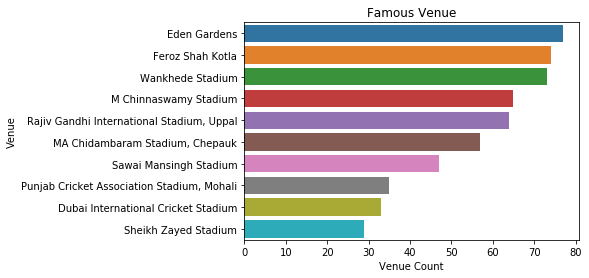

In [35]:
sns.barplot(x=dataset['venue'].value_counts().head(10).values,
            y=dataset['venue'].value_counts().head(10).index,
            data=dataset
           )

plt.title("Famous Venue")
plt.xlabel("Venue Count")
plt.ylabel("Venue")
plt.show()

###  Famous Player of the Match

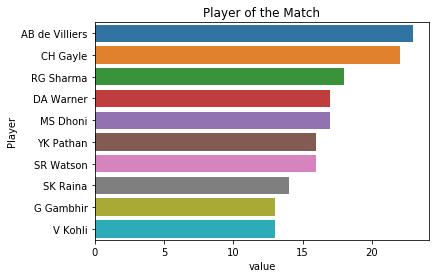

In [36]:
sns.barplot(x = dataset['player_of_match'].value_counts().head(10).values,
            y = dataset['player_of_match'].value_counts().head(10).index,
            data = dataset
           )
plt.title("Player of the Match")
plt.xlabel("value")
plt.ylabel("Player")
plt.show()